<a href="https://colab.research.google.com/github/psahai10/API_Project/blob/master/Zero_Shot_and_LP_Custom_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Custom-C Dataset

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# make directory to hold images
!mkdir /content/images/
# unzip and extract
!unzip -uq '/content/gdrive/MyDrive/vegetable_cuts_updated.zip' -d "/content/images"
# !unzip -uq '/content/gdrive/MyDrive/vegetable_cuts_in_folders.zip' -d "/content/images"

mkdir: cannot create directory ‘/content/images/’: File exists


In [ ]:
# #images = []
# texts = []
# directory = []

# for folder in os.listdir('/content/images/vegetable_cuts_in_folders/'):
#   for filename in [(i, filename) for i, filename in enumerate(os.listdir('/content/images/vegetable_cuts_in_folders/' + folder )) if filename.endswith(".png") or filename.endswith(".jpg")]:
#     if folder not in descriptions:
#       continue
#     #image = preprocess(Image.open(os.path.join('/content/images/vegetable_cuts_in_folders/', folder, filename[1])).convert("RGB"))
#     #images.append(image)
#     texts.append(folder)
#     directory.append('/content/images/vegetable_cuts_in_folders/' + folder +'/'+ filename[1])


In [ ]:
# labels_dist = texts
# image_urls = directory

# print(f'# of images: {len(image_urls)}')
# print(f'# of labels: {len(labels_dist)}')

# of images: 4813
# of labels: 4813


In [ ]:
# extract image_urls and label_names
import os
image_urls = []
labels_dist = []

path = '/content/images/vegetable_cuts'
for f in os.listdir(path):
  if(f!='.DS_Store'):
    image = os.path.join(path, f)
    image_urls.append(image)
    f = f.split('.')[-2]
    stemmed = ''.join([i for i in f if not i.isdigit()])
    stemmed = stemmed.replace('()','')
    stemmed = stemmed.strip()
    labels_dist.append(stemmed)

print(f'# of images: {len(image_urls)}')
print(f'# of labels: {len(labels_dist)}')

# of images: 2415
# of labels: 2415


In [ ]:
food_labels = sorted(list(set(labels_dist)))
len(food_labels)

37

# Import Resources for Labelling

In [ ]:
# # copy files from drive to current session
# !cp /content/gdrive/MyDrive/Resources/labels_dict.py /content/
# !cp /content/gdrive/MyDrive/Resources/labels_categories0308.csv /content/

In [ ]:
# import pandas as pd
# from labels_dict import *

In [ ]:
# store urls and raw labels in dataframe
import pandas as pd
df = pd.DataFrame(list(zip(image_urls,labels_dist)), columns = ['image_urls', 'labels_dist'])

In [ ]:
# df['labels_dist'] = df['labels_dist'].str.replace('\\','')

In [ ]:
df.head()

,image_urls,labels_dist
0,/content/images/vegetable_cuts/tomatoes slices...,tomatoes slices
1,/content/images/vegetable_cuts/french fries37.jpg,french fries
2,/content/images/vegetable_cuts/potatoes halves...,potatoes halves
3,/content/images/vegetable_cuts/summer squash (...,summer squash (zucchini) halves
4,/content/images/vegetable_cuts/cauliflower sli...,cauliflower sliced


In [ ]:
# # clean label names
# label_names = []
# for i in labels_dist:
#   if i in labels_dict:
#     label_names.append(labels_dict[i].lower()) # use the pre-defined dictionary
#   else:
#     label_names.append(i)

# # Add cleaned labels to df
# df['labels_clean']= label_names
# df.labels_clean = df.labels_clean.str.replace('_',' ')
# df.drop(columns='labels_dist', inplace=True)
# df.columns = ['image_urls','label']

In [ ]:
# # load current labels/categories csv
# csv_path = 'labels_categories0308.csv'
# all_labels_cats = pd.read_csv(csv_path, encoding='UTF-8')

# # remove extra columns
# all_labels_cats = all_labels_cats[['label','category','common_in_america']]

# Create `main_df` 
  - `image_url`, `label`, `category`, `common_in_america`

In [ ]:
# main_df = df.merge(all_labels_cats, how='left')
# main_df.drop(main_df[main_df.category.isna()].index, inplace=True)
# main_df.columns = ['image_url', 'label', 'category','common_in_america']
# main_df.describe()

In [ ]:
import subprocess
 
CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)
 
if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

CUDA version: 11.0


In [ ]:
!pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html
!pip install ftfy regex

import torch

print("Torch version:", torch.__version__)

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1MB 1.2MB/s eta 0:04:28tcmalloc: large alloc 1147494400 bytes == 0x559ca7b92000 @  0x7fab0bb1f615 0x559c6e8f906c 0x559c6e9d8eba 0x559c6e8fbe8d 0x559c6e9ed99d 0x559c6e96ffe9 0x559c6e96ab0e 0x559c6e8fd77a 0x559c6e96fe50 0x559c6e96ab0e 0x559c6e8fd77a 0x559c6e96c86a 0x559c6e9ee7c6 0x559c6e96bee2 0x559c6e9ee7c6 0x559c6e96bee2 0x559c6e9ee7c6 0x559c6e96bee2 0x559c6e9ee7c6 0x559c6ea70431 0x559c6e9d1049 0x559c6e93bc84 0x559c6e8fc8e9 0x559c6e970ade 0x559c6e8fd69a 0x559c6e96ba45 0x559c6e96ae0d 0x559c6e8fd77a 0x559c6e96ba45 0x559c6e8fd69a 0x559c6e96ba45
     |█████████████████████████████▏  | 1055.7MB 1.1MB/s eta 0:01:29tcmalloc: large alloc 1434370048 bytes == 0x559cec1e8000 @  0x7fab0bb1f615 0x559c6e8f906c 0x559c6e9d8eba 0x559c6e8fbe8d 0x559c6e9ed99d 0x559c6e96ffe9 0x559c6e96ab0e 0x559c6e8fd77a 0x559c6e96fe50 0x559c6e96ab0e 0x559c6e8fd77a 0x559c6e96c86a 0x559c6e9ee7c6 0x559c6e96bee2 0

In [18]:
!git clone https://github.com/openai/CLIP.git
%cd CLIP

Cloning into 'CLIP'...
remote: Enumerating objects: 74, done.
remote: Total 74 (delta 0), reused 0 (delta 0), pack-reused 74
Unpacking objects: 100% (74/74), done.
/content/CLIP


In [19]:
import os
import clip
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [20]:
# main_df.head()

In [21]:
# labels_concat = []

# for index, row in main_df.iterrows():
#     labels_concat.append(f"{row['label']}, a type of {row['category']}")

# labels_concat[:10]

In [22]:
# main_df['labels_concat']= labels_concat

In [23]:
main_df = df

In [24]:
food_types = list(main_df['labels_dist'].unique())
sorted_food = sorted(food_types)
dictionary_key_value = {v:k for k,v in enumerate(sorted_food)}

In [25]:
sorted_food

['Diced peppers',
 'Whole peppers',
 'Whole tomatoes',
 'asparagus spears',
 'broccoli florets',
 'brussels sprouts halved',
 'brussels sprouts whole',
 'carrots sliced',
 'carrots whole',
 'cauliflower florets',
 'cauliflower sliced',
 'cauliflower whole',
 'eggplant diced',
 'eggplant halves',
 'eggplant whole',
 'french fries',
 'green beans',
 'mashed potatoes',
 'mushrooms sliced',
 'mushrooms stuffed',
 'mushrooms whole',
 'peppers halves',
 'peppers sliced',
 'peppers stuffed',
 'potatoes cubes',
 'potatoes halves',
 'potatoes wedges',
 'potatoes whole',
 'summer squash (zucchini) halves',
 'summer squash (zucchini) slices',
 'sweet potatoes halves',
 'sweet potatoes whole',
 'tomatoes slices',
 'tomatoes stuffed',
 'winter squash halves',
 'winter squash slices']

In [26]:
labels = list(main_df['labels_dist'])

In [27]:
list_of_targets = [dictionary_key_value[label] for label in labels]

In [28]:
main_df['target'] = list_of_targets

In [29]:
main_df.head()

,image_urls,labels_dist,target
0,/content/images/vegetable_cuts/tomatoes slices...,tomatoes slices,32
1,/content/images/vegetable_cuts/french fries37.jpg,french fries,15
2,/content/images/vegetable_cuts/potatoes halves...,potatoes halves,25
3,/content/images/vegetable_cuts/summer squash (...,summer squash (zucchini) halves,28
4,/content/images/vegetable_cuts/cauliflower sli...,cauliflower sliced,10


In [30]:
# https://medium.com/analytics-vidhya/dealing-with-pytorch-custom-datasets-64b6c40fe581
class CustomDatasetFromImages(torch.utils.data.Dataset):
    def __init__(self, dataframe, transform):
        """
        Args:
            csv_path (string): path to csv file
            img_path (string): path to the folder where images are
            transform: pytorch transforms for transforms and tensor conversion
        """
        self.data_info = dataframe
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        self.label_arr = np.asarray(self.data_info.iloc[:, 2])
        self.data_len = len(self.data_info.index)
        self.transforms = transform

    def __getitem__(self, index):
        single_image_name = self.image_arr[index]
        img_as_img = Image.open(single_image_name).convert("RGB")
        tensor_image = self.transforms(img_as_img)
        single_image_label = self.label_arr[index]

        return (tensor_image, single_image_label)

    def __len__(self):
        return self.data_len

In [31]:
import numpy as np
import torch
import clip
from PIL import Image

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

model, transform = clip.load("ViT-B/32", device=device) #loading the clip checkpoints
input_resolution = model.input_resolution.item()
context_length = model.context_length.item()
vocab_size = model.vocab_size.item()

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

100%|████████████████████████████████████████| 354M/354M [00:01<00:00, 195MiB/s]


Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


In [32]:
from torch.utils.data import DataLoader
import torch
import clip
from PIL import Image
from tqdm import tqdm

if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

model, preprocess = clip.load("ViT-B/32", device=device) #loading the clip checkpoints
test_dataset = CustomDatasetFromImages(main_df, transform=preprocess)

In [33]:
torch.manual_seed(42)

def get_features(dataset):
    all_features = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(DataLoader(dataset, batch_size=100)):
            features = model.encode_image(images.to(device))

            all_features.append(features)
            all_labels.append(labels)

    return torch.cat(all_features).cpu().numpy(), torch.cat(all_labels).cpu().numpy()

In [34]:
test_features, test_labels = get_features(test_dataset)

100%|██████████| 25/25 [03:14<00:00,  7.80s/it]


In [36]:
id_class_name = {k:v for k,v in enumerate(sorted_food)}
class_id = list(id_class_name.keys())
class_name = list(id_class_name.values())
df_id_class = pd.DataFrame({'class_id':class_id,
                            'class_name':class_name})
df_id_class.head()

,class_id,class_name
0,0,Diced peppers
1,1,Whole peppers
2,2,Whole tomatoes
3,3,asparagus spears
4,4,broccoli florets


In [37]:
text_descriptions = [f"This is a photo of a {label}, a type of vegetable." for label in df_id_class['class_name']]

In [38]:
texts = clip.tokenize(text_descriptions).to('cpu') 

In [39]:
def get_topk(texts, test_features, test_labels, top_k=(1,5)):
  with torch.no_grad():
    text_features = model.encode_text(texts).float()
    image_features = test_features
    image_features = torch.from_numpy(image_features)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    _max = max(top_k)
    top_probs, top_labels = text_probs.cpu().topk(_max, dim=-1)
    pred = top_labels.t()
    target = torch.from_numpy(test_labels)
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    res = []
    for k in top_k:
      correct_k = correct[:k].reshape(-1).float().sum(0)
      res.append(correct_k.mul_(100.0 / len(test_labels)))
    inter_tensor = torch.stack(res)
    top1 = inter_tensor.data[0].item()
    top5 = inter_tensor.data[1].item()
    print(f'Top 1 accuracy is {top1}'.format(top1))
    print(f'Top {_max} accuracy is {top5}'.format({_max}, top5))


In [40]:
get_topk(texts, test_features, test_labels, top_k=(1,2))

Top 1 accuracy is 67.03933715820312
Top 2 accuracy is 85.21739196777344


In [41]:
get_topk(texts, test_features, test_labels, top_k=(1,3))

Top 1 accuracy is 67.03933715820312
Top 3 accuracy is 92.04969024658203


In [42]:
get_topk(texts, test_features, test_labels, top_k=(1,5))

Top 1 accuracy is 67.03933715820312
Top 5 accuracy is 96.48033142089844


In [43]:
with torch.no_grad():
  text_features = model.encode_text(texts).float()
  image_features = test_features
  image_features = torch.from_numpy(image_features)
  image_features /= image_features.norm(dim=-1, keepdim=True)
  text_features /= text_features.norm(dim=-1, keepdim=True)
  text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
  top_probs, top_labels = text_probs.cpu().topk(1, dim=-1)
  pred = top_labels.t()
  target = torch.from_numpy(test_labels)
  correct = pred.eq(target.view(1, -1).expand_as(pred))

In [44]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
conf_mat=confusion_matrix(target, np.squeeze(pred))
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)
# conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

''

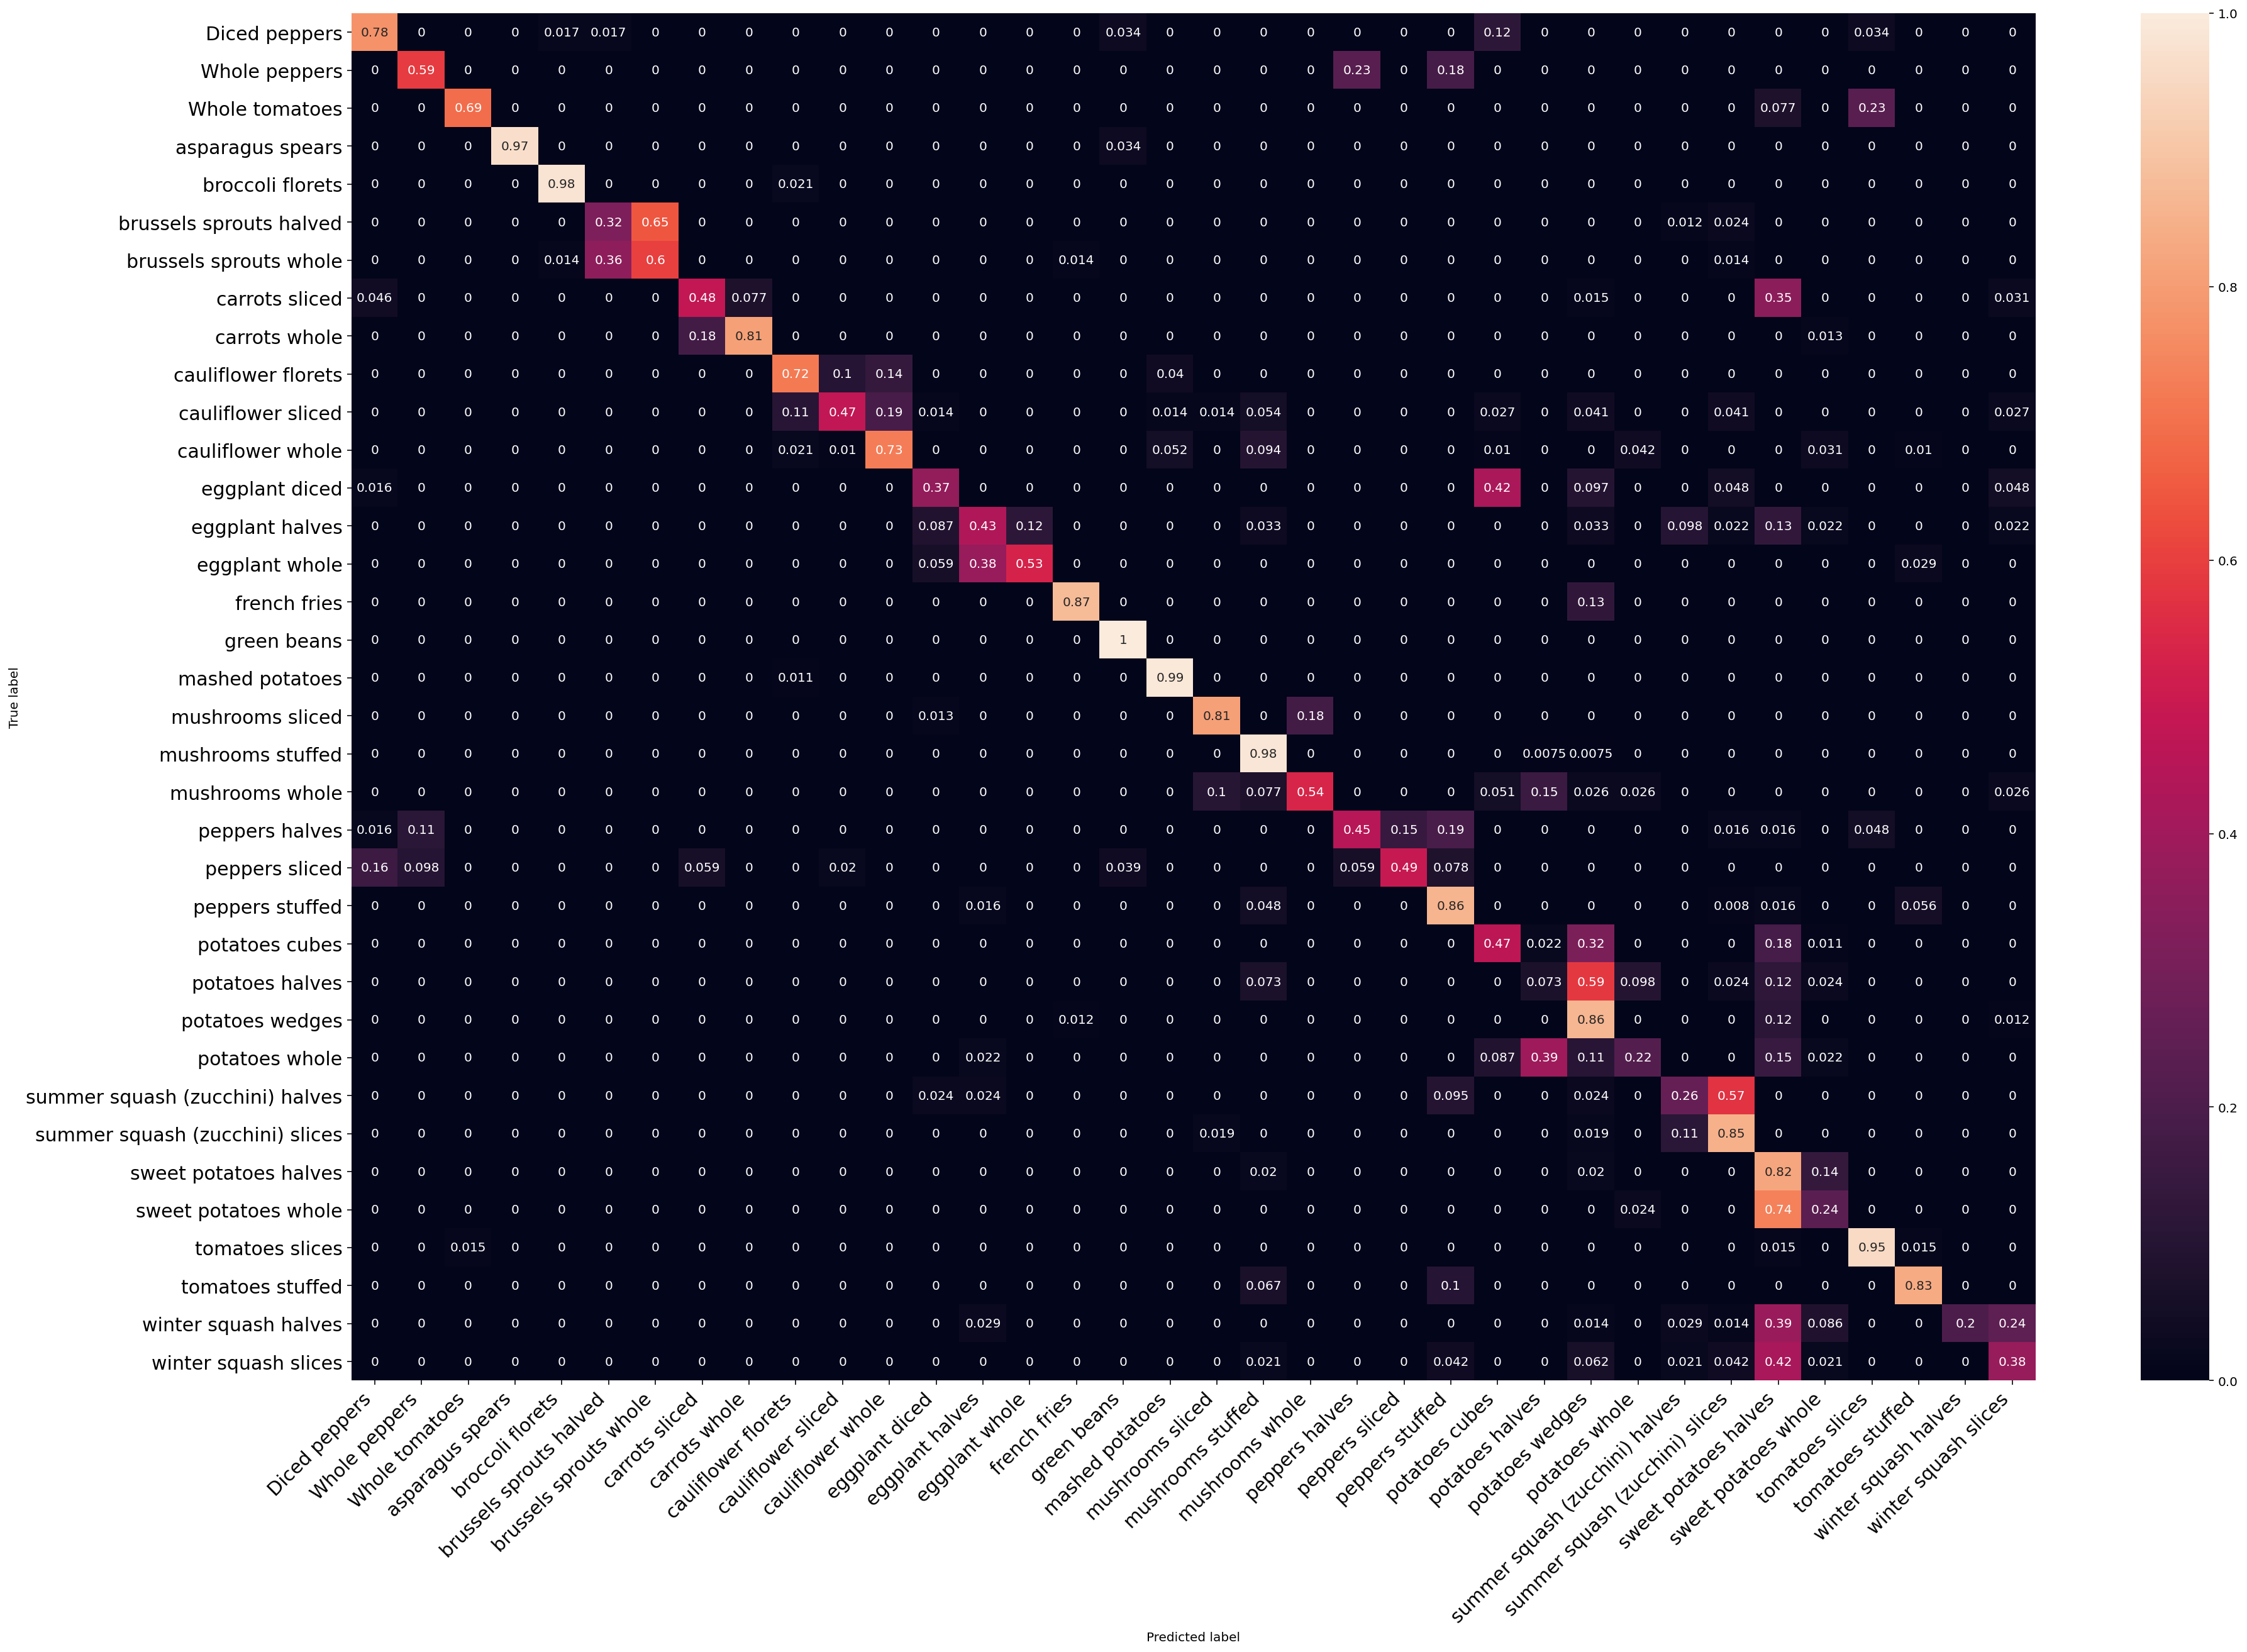

In [45]:
# %load_ext google.colab.data_table
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))

class_names = df_id_class.class_name
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names).astype(float)
df_cm
heatmap = sns.heatmap(df_cm, annot=True) #, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
;

In [46]:
unique_elements, counts_elements = np.unique(test_labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35]
 [ 58  22  13  88  48  85  70  65  78  50  74  96  62  92  34  95  77  93
   78 133  39  62  51 125  92  41  86  46  42  53  51  42  66  90  70  48]]


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0, penalty='l2', 
                         C=14, solver='liblinear', 
                         class_weight="balanced")


scores = cross_val_score(model, test_features, 
                         test_labels, cv=10, 
                         scoring="accuracy") 
print(scores)


[0.89256198 0.90909091 0.9214876  0.90082645 0.90909091 0.88381743
 0.91701245 0.91286307 0.88381743 0.92116183]


In [48]:
print(np.mean(scores))

0.9051730050409794


In [49]:
seed = [0, 42, 96, 100, 201]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(test_features, test_labels, test_size=0.33, 
                                                    random_state=seed[0], stratify=test_labels)

In [50]:
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression

# #Evaluate L1 regularization strengths for reducing features in final model 
# C = [1, 5, 10, 11, 12, 13, 14, 15] # As C decreases, more coefficients go to zero

# for c in C:
#     clf = LogisticRegression(penalty='l2', C=c, solver='liblinear', class_weight="balanced")
#     # using data before splitting (X_scaled) and (y)
#     scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")  #<-- add this
#     print(scores)  #<-- add this

In [51]:


from sklearn.linear_model import LogisticRegression
# Perform logistic regression
# *Note that the C value should be determined via a hyperparameter sweep using a validation split.
classifier = LogisticRegression(random_state=seed[1], C=14, verbose=1, solver='liblinear', penalty='l2')
classifier.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=14, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [52]:
def get_topk(classifier, X_test, y_test, top_k = (1, 5)):
  predictions = classifier.predict(X_test)
  probs = classifier.predict_proba(X_test)
  _max = max(top_k)
  best = np.argsort(probs, axis=1)[:,-(_max):]
  pred = torch.from_numpy(np.transpose(best))
  target = torch.from_numpy(y_test)
  correct = pred.eq(target.view(1, -1).expand_as(pred))
  res = []
  for k in top_k:
    correct_k = correct[:k].reshape(-1).float().sum(0)
    res.append(correct_k.mul_(100.0 / len(y_test)))
  inter_tensor = torch.stack(res)
  top5 = inter_tensor.data[1].item()
  top1 = np.mean((y_test == predictions))*100
  print(f'Top 1 accuracy is {top1}'.format(top1))
  print(f'Top {_max} accuracy is {top5}'.format(_max, top5))

In [53]:
get_topk(classifier, X_test, y_test, top_k = (1,2))

Top 1 accuracy is 90.08782936010039
Top 2 accuracy is 97.36511993408203


In [54]:
get_topk(classifier, X_test, y_test, top_k = (1, 3))

Top 1 accuracy is 90.08782936010039
Top 3 accuracy is 98.49435424804688


In [55]:
get_topk(classifier, X_test, y_test, top_k = (1, 5))

Top 1 accuracy is 90.08782936010039
Top 5 accuracy is 99.62358856201172


In [56]:
from sklearn.metrics import confusion_matrix
predictions = classifier.predict(X_test)
conf_mat=confusion_matrix(y_test, predictions)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1, keepdims=True)
# conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

''

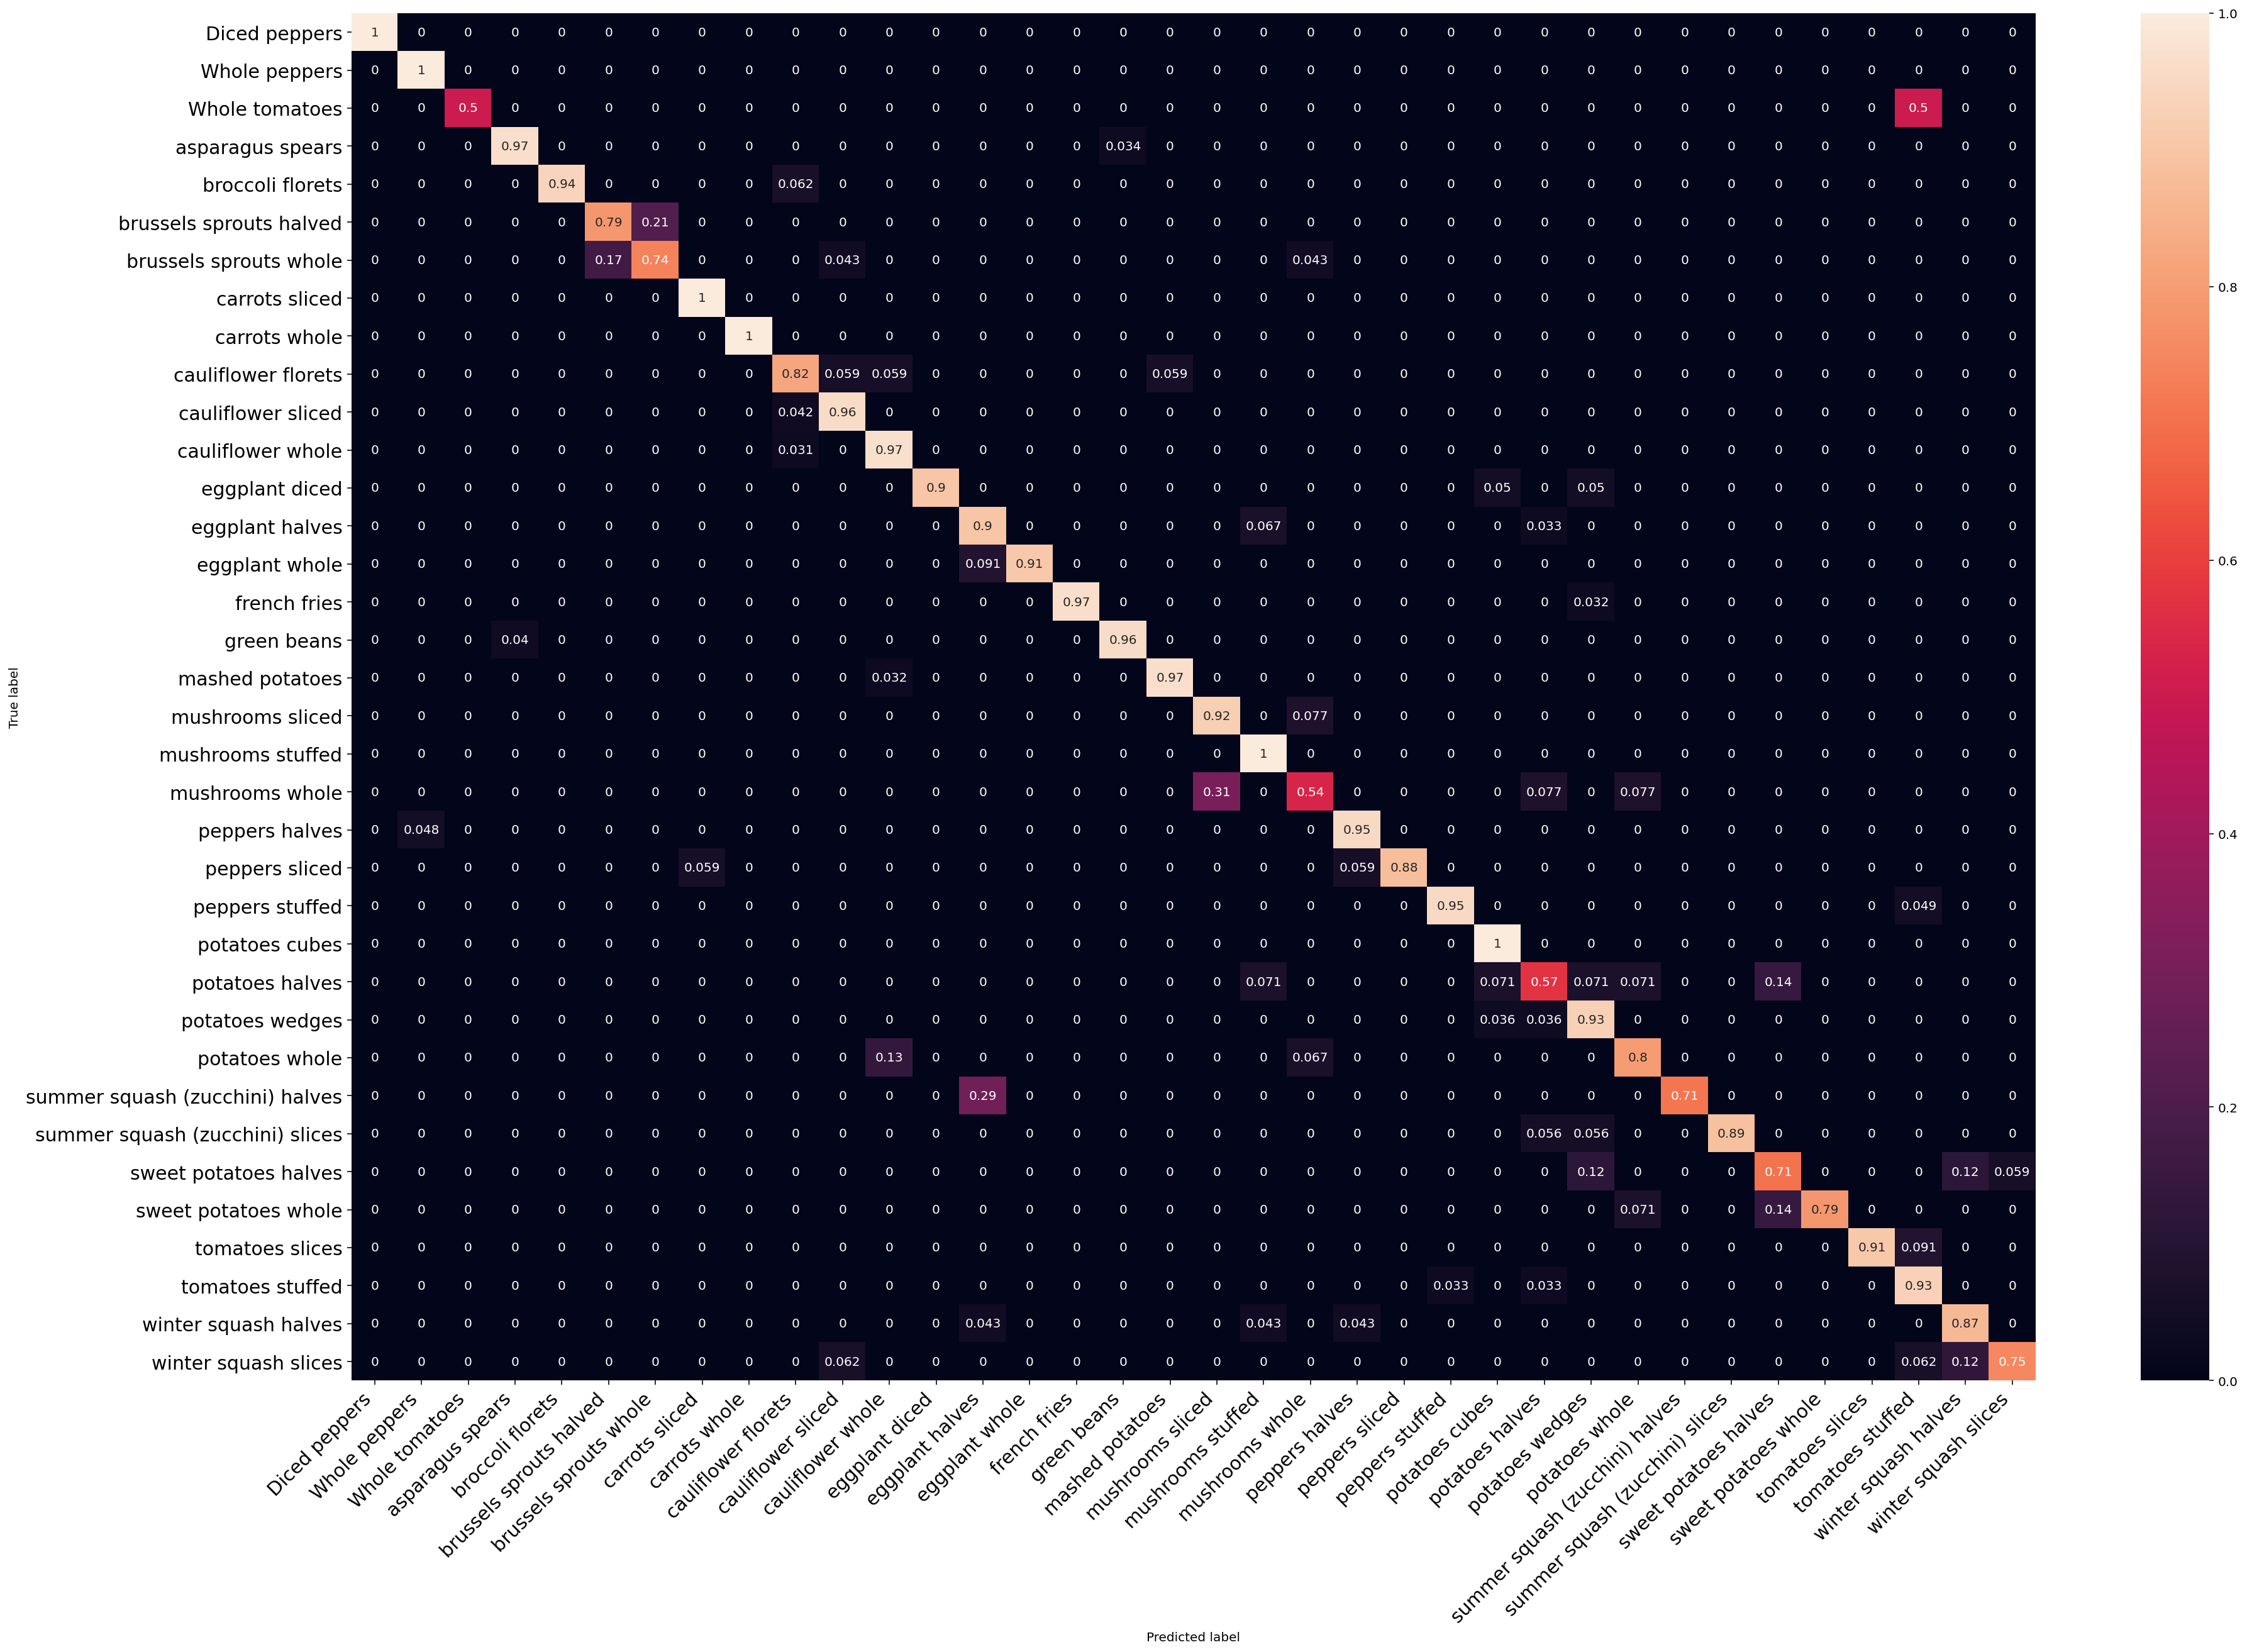

In [57]:
# %load_ext google.colab.data_table
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))

class_names = df_id_class.class_name
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names).astype(float)
df_cm
heatmap = sns.heatmap(df_cm, annot=True) #, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
;

### Code to save and reload model

In [ ]:
import joblib
filename = '/content/gdrive/MyDrive/linear_probe_03152021.sav'
joblib.dump(classifier, filename)

In [ ]:
# import joblib
model = joblib.load('/content/gdrive/MyDrive/linear_probe_03152021.sav')
probs = model.predict_proba(all_features.reshape(1,-1))

### If needed: Code to save json files with food classes in the same order that you have them to make the prediction (usually they are in alphabetical order)

In [ ]:
import json
# make new JSON file
with open('/content/drive/My Drive/food_classes.json', 'w') as outfile:
  json.dump(food_classes, outfile)